In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv('../Data/Featured_Data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group,total_services,avg_charge_per_service,Churn
0,0,0,0,0,1,0,1,0,1,0,...,0,0,1,2,29.85,29.85,0,3,7.462500,0
1,1,1,1,0,0,0,34,1,0,0,...,0,1,0,3,56.95,1889.50,2,5,9.491667,0
2,2,2,1,0,0,0,2,1,0,0,...,0,0,1,3,53.85,108.15,0,5,8.975000,1
3,3,3,1,0,0,0,45,0,1,0,...,0,1,0,0,42.30,1840.75,2,7,5.287500,0
4,4,4,0,0,0,0,2,1,0,1,...,0,0,1,2,70.70,151.65,0,2,23.566667,1


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((4914, 24), (2107, 24))

In [56]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # or 'mean' or 'most_frequent'
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [57]:
X_train = X_train.dropna()
X_test = X_test.dropna()

In [58]:
X=df.drop(columns=['Churn'],axis=1)
y=df['Churn']

In [59]:
y.value_counts()

Churn
0    5164
1    1857
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [61]:

Models = {
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'Xgboost':XGBClassifier()
}

for name, model in Models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Some models may not have predict_proba (e.g., SVC if probability=False)
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Use decision_function as a fallback for ROC AUC
        y_train_proba = model.decision_function(X_train)
        y_test_proba = model.decision_function(X_test)
    
    # Train Metrics
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_roc_auc = roc_auc_score(y_train, y_train_proba)
    
    # Test Metrics
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_roc_auc = roc_auc_score(y_test, y_test_proba)
    
    print(f"Model: {name}")
    print(f"Train Set - Accuracy: {model_train_accuracy:.2f}, Precision: {model_train_precision:.2f}, Recall: {model_train_recall:.2f}, F1 Score: {model_train_f1:.2f}, ROC AUC: {model_train_roc_auc:.2f}")
    print(f"Test Set  - Accuracy: {model_test_accuracy:.2f}, Precision: {model_test_precision:.2f}, Recall: {model_test_recall:.2f}, F1 Score: {model_test_f1:.2f}, ROC AUC: {model_test_roc_auc:.2f}")
    print("="*60)

Model: DecisionTree
Train Set - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00, ROC AUC: 1.00
Test Set  - Accuracy: 0.73, Precision: 0.48, Recall: 0.52, F1 Score: 0.73, ROC AUC: 0.66


C:\Users\Qosain\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Train Set - Accuracy: 0.81, Precision: 0.66, Recall: 0.57, F1 Score: 0.80, ROC AUC: 0.85
Test Set  - Accuracy: 0.79, Precision: 0.62, Recall: 0.54, F1 Score: 0.79, ROC AUC: 0.85
Model: RandomForest
Train Set - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00, ROC AUC: 1.00
Test Set  - Accuracy: 0.80, Precision: 0.65, Recall: 0.49, F1 Score: 0.79, ROC AUC: 0.82
Model: AdaBoost
Train Set - Accuracy: 0.81, Precision: 0.67, Recall: 0.55, F1 Score: 0.80, ROC AUC: 0.85
Test Set  - Accuracy: 0.80, Precision: 0.64, Recall: 0.52, F1 Score: 0.79, ROC AUC: 0.85
Model: GradientBoosting
Train Set - Accuracy: 0.83, Precision: 0.74, Recall: 0.57, F1 Score: 0.82, ROC AUC: 0.89
Test Set  - Accuracy: 0.79, Precision: 0.64, Recall: 0.48, F1 Score: 0.78, ROC AUC: 0.84
Model: Xgboost
Train Set - Accuracy: 0.98, Precision: 0.96, Recall: 0.97, F1 Score: 0.98, ROC AUC: 1.00
Test Set  - Accuracy: 0.78, Precision: 0.60, Recall: 0.50, F1 Score: 0.78, ROC AUC: 0.81


In [62]:
from sklearn.model_selection import RandomizedSearchCV 
# Random Forest
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Gradient Boosting
gb_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}

# XGBoost
xgb_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0],
}

# Logistic Regression
lr_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}




In [63]:
randomcv_models = [
    ('RandomForest', RandomForestClassifier(), rf_grid),
    ('GradientBoosting', GradientBoostingClassifier(), gb_grid),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_grid),
    ('LogisticRegression', LogisticRegression(max_iter=1000), lr_grid),
]


In [64]:
best_models = {}

for name, model, params in randomcv_models:
    print(f"\n🔍 Tuning hyperparameters for {name}...\n")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=10,               # You can change it to 50 for better results
        scoring='accuracy',
        cv=5,
        verbose=2,
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train, y_train)   # Make sure X_train and y_train are defined
    best_models[name] = random_search.best_estimator_

    print(f"\n✅ Best hyperparameters for {name}: {random_search.best_params_}")
    print(f"✅ Best score for {name}: {random_search.best_score_:.4f}")



🔍 Tuning hyperparameters for RandomForest...

Fitting 5 folds for each of 10 candidates, totalling 50 fits

✅ Best hyperparameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 10}
✅ Best score for RandomForest: 0.8036

🔍 Tuning hyperparameters for GradientBoosting...

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Qosain\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



✅ Best hyperparameters for GradientBoosting: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
✅ Best score for GradientBoosting: 0.8034

🔍 Tuning hyperparameters for XGBoost...

Fitting 5 folds for each of 10 candidates, totalling 50 fits

✅ Best hyperparameters for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
✅ Best score for XGBoost: 0.8075

🔍 Tuning hyperparameters for LogisticRegression...

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\Qosain\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



✅ Best hyperparameters for LogisticRegression: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
✅ Best score for LogisticRegression: 0.8034


C:\Users\Qosain\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

model_scores = {}

for name, model_dict in best_models.items():
   
    model = model_dict['model'] if isinstance(model_dict, dict) else model_dict

    y_pred = model.predict(X_test)


    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = None  


    accuracy = accuracy_score(y_test, y_pred)


    model_scores[name] = {
        'accuracy': accuracy,
        'roc_auc': roc_auc
    }

print("Model Performance:")
for name, scores in model_scores.items():
    print(f"{name}: Accuracy = {scores['accuracy']:.4f}, ROC AUC = {scores['roc_auc']:.4f}")



Model Performance:
RandomForest: Accuracy = 0.7983, ROC AUC = 0.8369
GradientBoosting: Accuracy = 0.7945, ROC AUC = 0.8417
XGBoost: Accuracy = 0.7959, ROC AUC = 0.8447
LogisticRegression: Accuracy = 0.7969, ROC AUC = 0.8444


In [82]:
# Select best model by both accuracy and ROC AUC
best_model_name = max(model_scores, key=lambda name: (model_scores[name]['accuracy'], model_scores[name]['roc_auc']))
best_model = best_models[best_model_name]['model'] if isinstance(best_models[best_model_name], dict) else best_models[best_model_name]

print(f"\n✅ Best Model: {best_model_name}")
print(f"Accuracy: {model_scores[best_model_name]['accuracy']:.4f}")
print(f"ROC AUC: {model_scores[best_model_name]['roc_auc']:.4f}")



✅ Best Model: RandomForest
Accuracy: 0.7983
ROC AUC: 0.8369


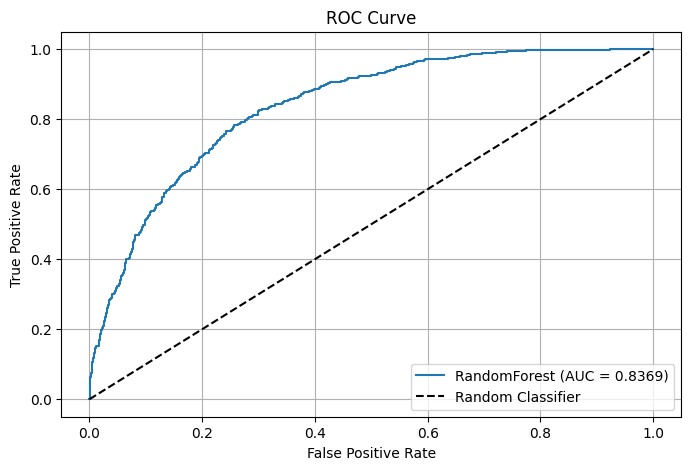

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


y_proba_best = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {model_scores[best_model_name]['roc_auc']:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
